In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("Sample_Superstore.csv", encoding='latin1')
df['Order Date'] = pd.to_datetime(df['Order Date'], errors = 'coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors = 'coerce')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [19]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Year',
       'Month'],
      dtype='object')

In [15]:
df['Year'] = df['Order Date'].dt.year
df["Month"] = df["Order Date"].dt.to_period("M").astype(str)  # 'YYYY-MM'
df[['Order Date', 'Year', 'Month']].head(5)

,Order Date,Year,Month
0,2016-11-08,2016,2016-11
1,2016-11-08,2016,2016-11
2,2016-06-12,2016,2016-06
3,2015-10-11,2015,2015-10
4,2015-10-11,2015,2015-10


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [17]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Year             0
Month            0
dtype: int64

In [17]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Year
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896,2015.722233
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,2014.000000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750,2015.000000
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500,2016.000000
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000,2017.000000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000,2017.000000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108,1.123555


In [21]:
print(df["Region"].value_counts())

Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64


In [22]:
print(df["Segment"].value_counts())

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64


In [23]:
print(df["Category"].value_counts())

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64


In [24]:
print(df["Sub-Category"].value_counts())

Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64


### KPI's

In [37]:
# total sales & profit
total_sales = df['Sales'].sum() #total revenue
total_profit = df ['Profit'].sum()

# no. of unique orders
num_orders = df['Order ID'].nunique()

# average order value
order_sales = df.groupby('Order ID', as_index = False)['Sales'].sum()
aov = order_sales['Sales'].mean()

# Profit Margin
profit_margin = (total_profit/total_sales)*100 if total_sales !=0 else 0.0

print(f"Total Sales: {total_sales:,.2f}")
print(f"Total Profit: {total_profit:,.2f}")
print(f"N0. of orders: {num_orders}")
print(f"Average Order Value: {aov:,.2f}")
print(f"Profit Margin(%): {profit_margin:,.2f}")

Total Sales: 2,297,200.86
Total Profit: 286,397.02
N0. of orders: 5009
Average Order Value: 458.61
Profit Margin(%): 12.47


### Visualization 1: Sales by Month

In [46]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors = 'coerce')

df_month = df.set_index('Order Date')

monthly_sales = df_month['Sales'].resample('M').sum().reset_index()
monthly_sales.rename(columns={"Order Date":"Month", "Sales":"Total Sales"}, inplace=True)

monthly_sales.sort_values('Month', inplace=True)

C:\Users\tanik\AppData\Local\Temp\ipykernel_32424\416225929.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df_month['Sales'].resample('M').sum().reset_index()


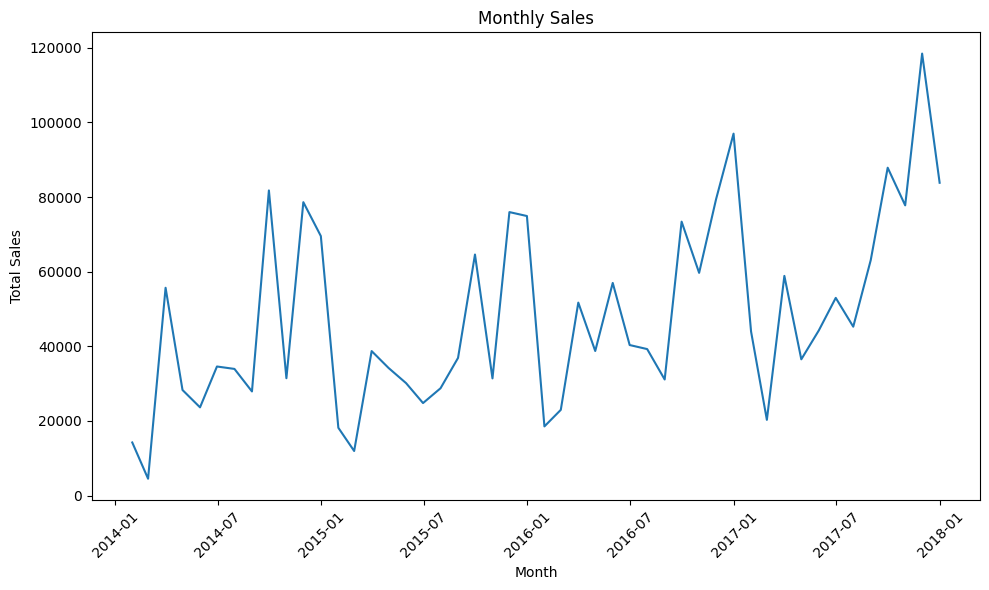

In [49]:
plt.figure(figsize=(10,6))
plt.plot(monthly_sales['Month'], monthly_sales['Total Sales'])
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Visualization 2 — Sales & Profit by Category

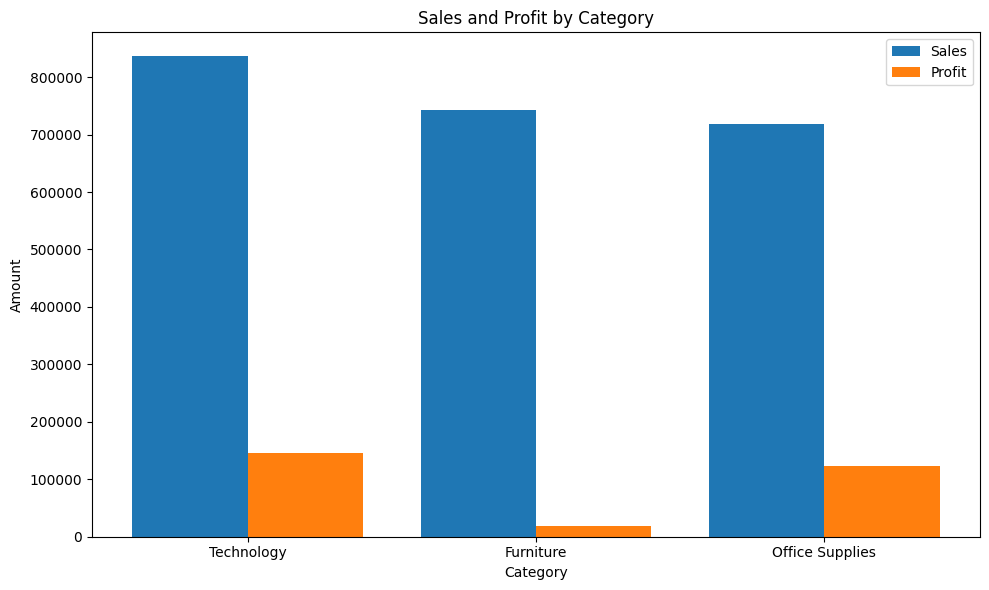

In [62]:
cat = (df.groupby('Category', as_index=False)[['Sales','Profit']].sum())
cat = cat.sort_values('Sales', ascending=False)

#prepare the x positions for bars (0, 1, 2, … one spot per Category)
x_positions = range(len(cat))

bar_width = 0.4
plt.figure(figsize=(10,6))
plt.bar(
    [x-bar_width/2 for x in x_positions],
    cat['Sales'],
    width=bar_width,
    label='Sales'
)

plt.bar(
    [x+bar_width/2 for x in x_positions],
    cat['Profit'],
    width=bar_width,
    label='Profit',
)

plt.xticks(
    ticks=list(x_positions),                 # where to place labels
    labels=cat["Category"],                  # the category names
    rotation=0                               # keep horizontal
)

plt.title('Sales and Profit by Category')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.legend()
plt.tight_layout()
plt.show()

In [63]:
## sales and profit by category and month/year

### Visualization 3 — Sales by Region

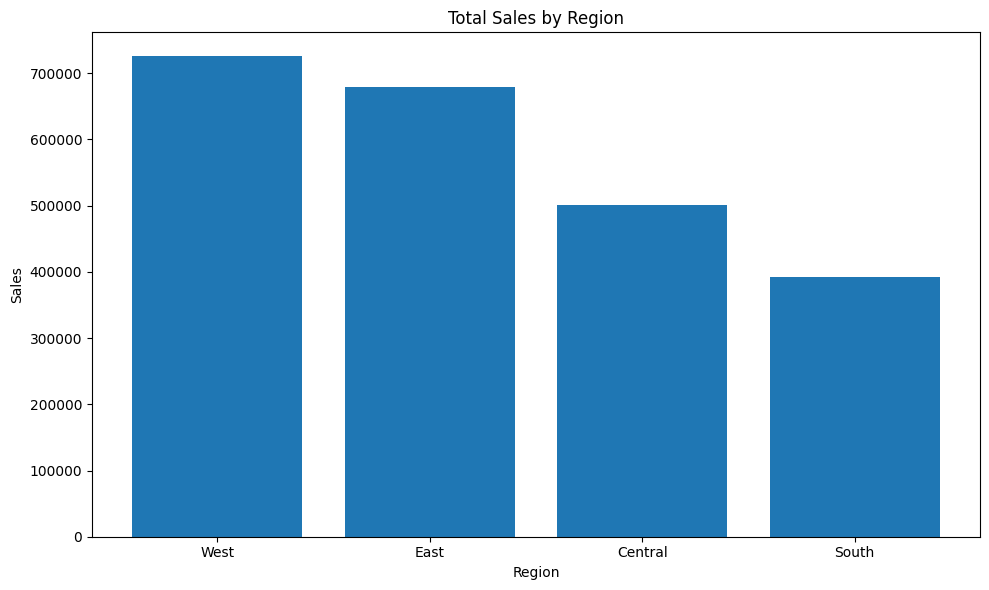

In [66]:
region_sales = df.groupby('Region', as_index=False)['Sales'].sum()

# sort by sales
region_sales = region_sales.sort_values('Sales', ascending=False)

plt.figure(figsize=(10,6))
plt.bar(region_sales['Region'], region_sales['Sales'])
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.tight_layout()
plt.xticks(rotation=0)
plt.show()

### Visualization 4 - Discount vs Profit

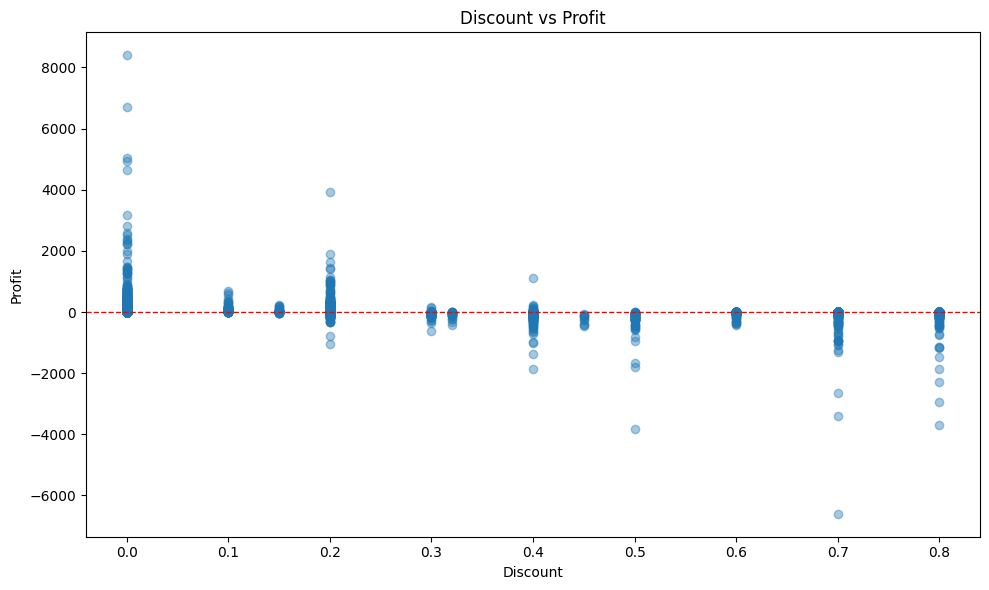

In [69]:
plt.figure(figsize=(10,6))
plt.scatter(df['Discount'], df['Profit'], alpha=0.4)
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

### Visualization 5: Sales by Sub-Category

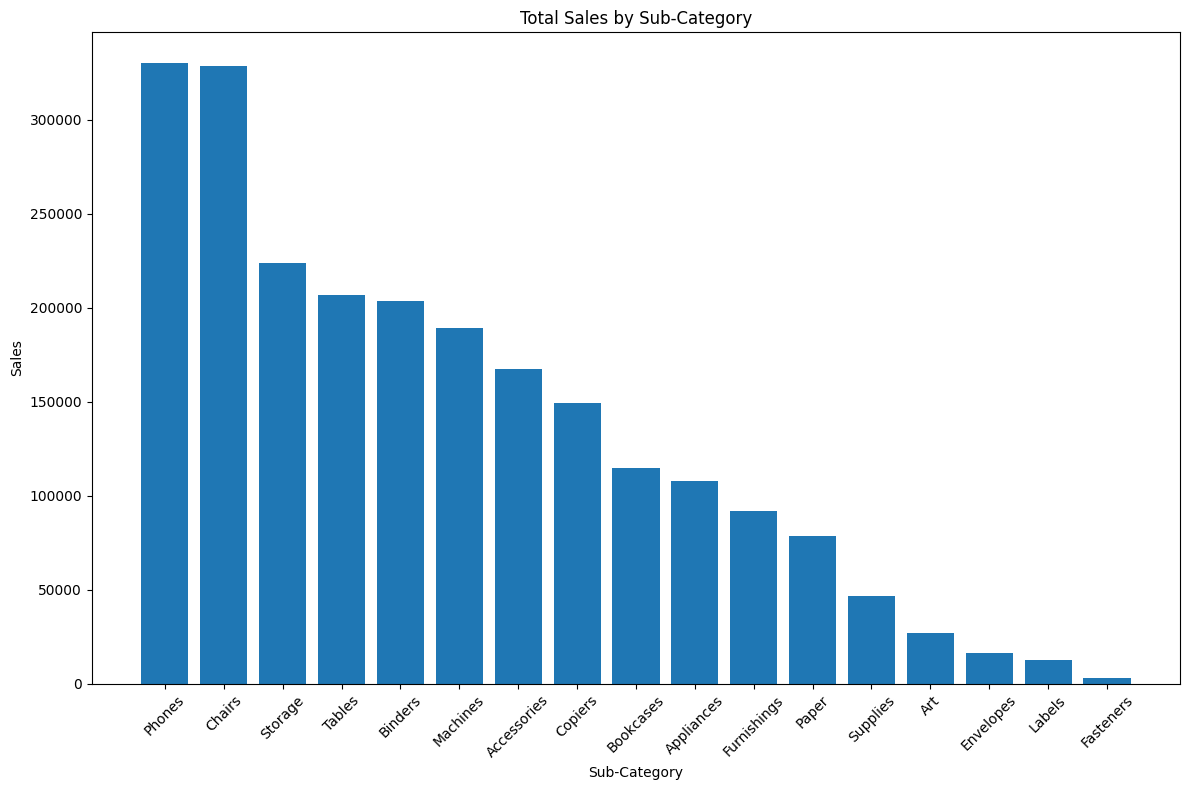

In [79]:
sub_sales = df.groupby('Sub-Category', as_index=False)['Sales'].sum()
sub_sales = sub_sales.sort_values('Sales', ascending=False)

plt.figure(figsize=(12,8))
plt.bar(sub_sales['Sub-Category'], sub_sales['Sales'])
plt.title('Total Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Visualization 6 - Profit by State

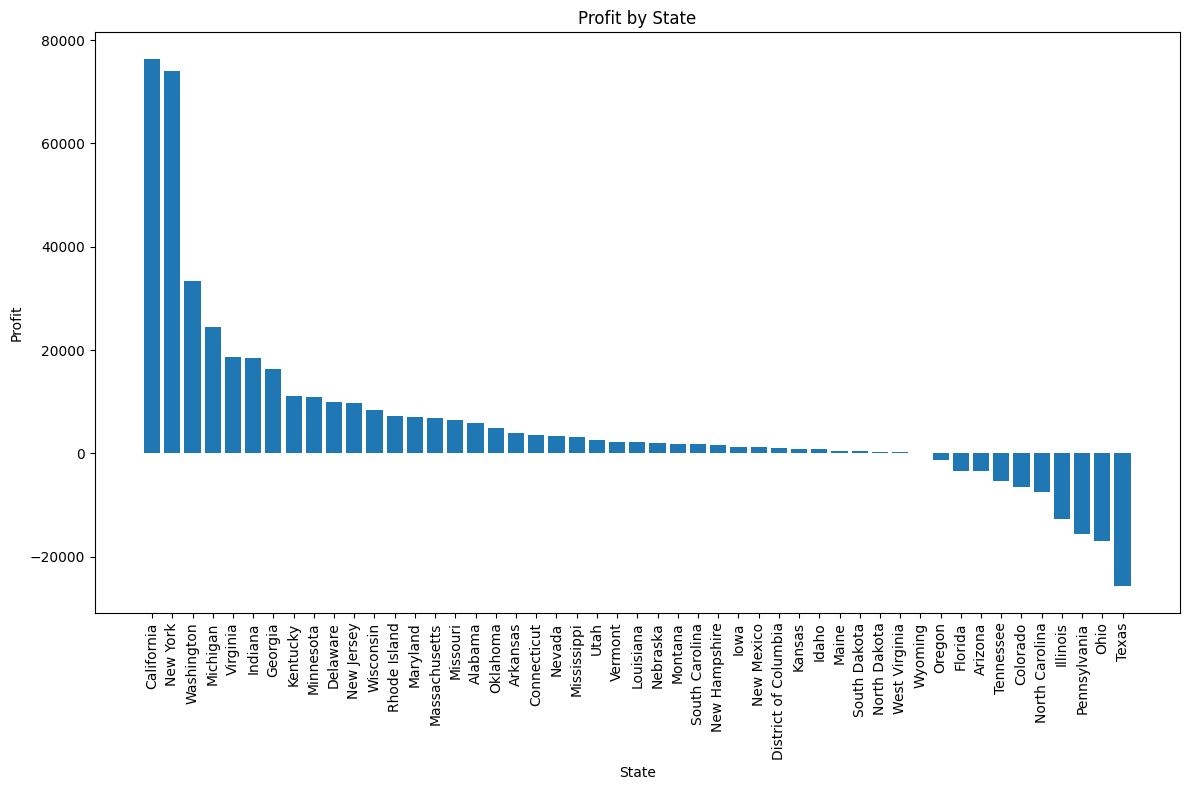

In [85]:
state_profit = df.groupby('State', as_index=False)['Profit'].sum()
state_profit = state_profit.sort_values('Profit', ascending=False)
plt.figure(figsize=(12,8))
plt.bar(state_profit['State'], state_profit['Profit'])
plt.title('Profit by State')
plt.xlabel('State')
plt.ylabel('Profit')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Visualization 7 - Profit Margin % by Category

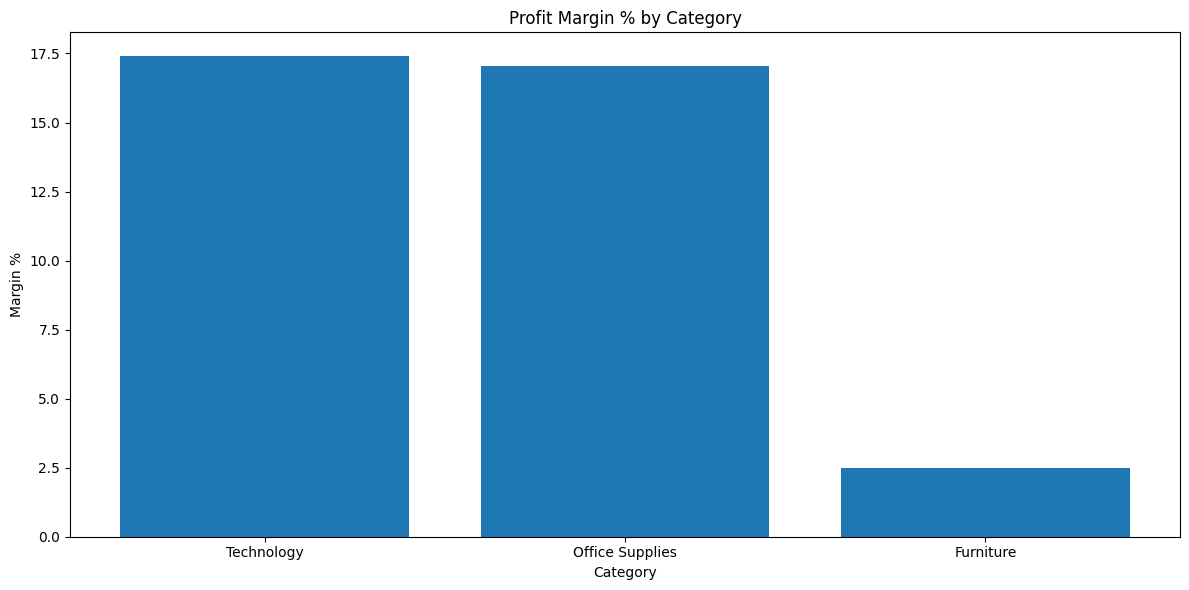

In [93]:
cat_totals = df.groupby('Category', as_index=False)[['Sales', 'Profit']].sum()

cat_totals['Margin %'] = np.where(
    cat_totals['Sales'] !=0,
    (cat_totals['Profit']/cat_totals['Sales'])*100.0,
    0.0
)

cat_totals = cat_totals.sort_values('Margin %', ascending = False)

plt.figure(figsize=(12,6))
plt.bar(cat_totals['Category'], cat_totals['Margin %'])
plt.title('Profit Margin % by Category')
plt.xlabel('Category')
plt.ylabel('Margin %')
plt.tight_layout()
plt.show()

### Visualization 8 - Sales and Profit by Customer Segment Analysis

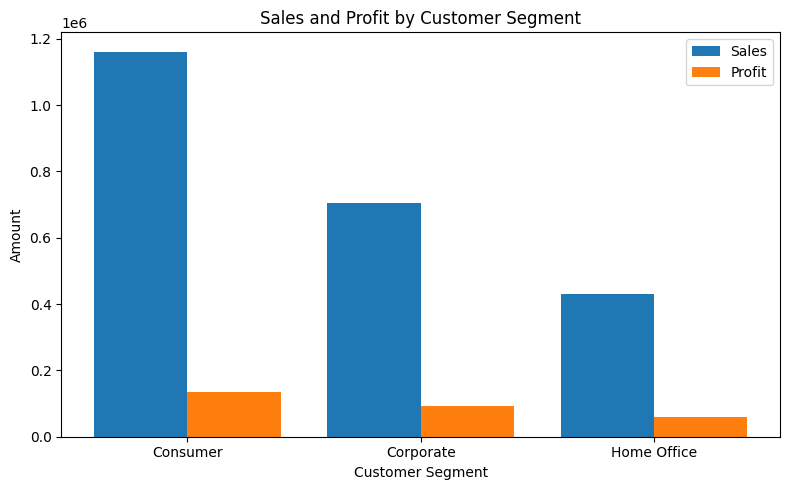

In [94]:
seg = df.groupby("Segment", as_index=False)[["Sales", "Profit"]].sum()
seg = seg.sort_values(by="Sales", ascending=False)

# Creating X positions for side-by-side bars
x_positions = np.arange(len(seg))     # [0, 1, 2] if 3 segments
bar_width = 0.4                       

plt.figure(figsize=(8,5))
plt.bar(x_positions - bar_width/2, seg["Sales"], width=bar_width, label="Sales")
plt.bar(x_positions + bar_width/2, seg["Profit"], width=bar_width, label="Profit")
plt.xticks(ticks=x_positions, labels=seg["Segment"])
plt.title("Sales and Profit by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Amount")
plt.legend()
plt.tight_layout()
plt.show()


In [96]:
# add any columns we created and want to keep
if "Year" not in df.columns:
    df["Year"] = df["Order Date"].dt.year
if "Month" not in df.columns:
    df["Month"] = df["Order Date"].dt.to_period("M").astype(str)
if "Profit Margin %" not in df.columns:
    df["Profit Margin %"] = (df["Profit"] / df["Sales"]) * 100

# save cleaned data to a new CSV
df.to_csv("Cleaned_Superstore.csv", index=False)
print('Dataset saved to files')

Dataset saved to files
